In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('Kaagle_Upload.csv')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df_all[['journey_purpose_of_driver', 'accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week', 'age_of_driver', 'age_of_vehicle']]
print(df.shape)
df.head()

(285331, 14)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day_of_week,age_of_driver,age_of_vehicle
0,6,3,6,3,4,1,1,1,0,0,1,2,45,11
1,6,3,3,6,2,1,1,1,0,0,1,7,25,1
2,6,3,3,6,2,1,1,1,0,0,1,7,51,-1
3,1,3,6,0,-1,1,1,1,0,0,1,4,50,1
4,6,3,6,3,4,1,1,1,0,0,1,6,27,-1


In [4]:
# remove all -1 values as they indicate data is missing
df = df[df['age_of_vehicle'] != -1]
df = df[df['age_of_driver'] != -1]
df = df[df['day_of_week'] != -1]
df = df[df['urban_or_rural_area'] != 3]
df = df[df['carriageway_hazards'] != -1]
df = df[df['special_conditions_at_site'] != -1]
df = df[df['road_surface_conditions'] != -1]
df = df[df['weather_conditions'] != -1]
df = df[df['light_conditions'] != -1]
df = df[df['junction_control'] != -1]
df = df[df['junction_detail'] != -1]
df = df[df['road_type'] != -1]
df = df[df['journey_purpose_of_driver'] != -1]
df = df[df['accident_severity'] != -1]
df.shape


(110842, 14)

### Road Surface Conditions

In [5]:
df_rsac = df[['road_surface_conditions', 'accident_severity']]
df_rsac

,road_surface_conditions,accident_severity
0,1,3
1,1,3
6,1,3
7,1,3
8,1,3
...,...,...
285307,2,3
285312,2,3
285313,2,3
285314,2,3


In [6]:
df_rsac['road_surface_conditions'].replace(1, 'dry', inplace=True)
df_rsac['road_surface_conditions'].replace(2, 'wet or damp', inplace=True)
df_rsac['road_surface_conditions'].replace(3, 'snow', inplace=True)
df_rsac['road_surface_conditions'].replace(4, 'frost or ice', inplace=True)
df_rsac['road_surface_conditions'].replace(5, 'flood', inplace=True)
df_rsac

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,road_surface_conditions,accident_severity
0,dry,3
1,dry,3
6,dry,3
7,dry,3
8,dry,3
...,...,...
285307,wet or damp,3
285312,wet or damp,3
285313,wet or damp,3
285314,wet or damp,3


In [7]:
df_rsac3 = df_rsac[df_rsac['accident_severity'] == 3]
df_rsac2 = df_rsac[df_rsac['accident_severity'] == 2]
df_rsac1 = df_rsac[df_rsac['accident_severity'] == 1]
df_rsac1


,road_surface_conditions,accident_severity
377,wet or damp,1
378,wet or damp,1
379,wet or damp,1
920,dry,1
1314,dry,1
...,...,...
285244,dry,1
285245,dry,1
285246,dry,1
285247,dry,1


In [8]:
print(df_rsac3['road_surface_conditions'].value_counts())
print(df_rsac2['road_surface_conditions'].value_counts())
print(df_rsac1['road_surface_conditions'].value_counts())

dry             71658
wet or damp     24156
frost or ice      581
snow              248
flood              43
Name: road_surface_conditions, dtype: int64
dry             9875
wet or damp     3303
frost or ice      80
snow              13
flood              7
Name: road_surface_conditions, dtype: int64
dry             669
wet or damp     203
frost or ice      4
snow              2
Name: road_surface_conditions, dtype: int64


In [9]:
y3 = df_rsac3['road_surface_conditions'].value_counts()
y3.to_frame()
df_rsactot = pd.DataFrame({'accident severity 3': y3})
df_rsactot

,accident severity 3
dry,71658
wet or damp,24156
frost or ice,581
snow,248
flood,43


In [13]:
y2 = df_rsac2['road_surface_conditions'].value_counts()
y2.to_list()
df_rsactot.insert(1, 'accident severity 2', y2, True)
df_rsactot

,accident severity 3,accident severity 2
dry,71658,9875
wet or damp,24156,3303
frost or ice,581,80
snow,248,13
flood,43,7


In [14]:
df_rsac1['road_surface_conditions'].value_counts()

dry             669
wet or damp     203
frost or ice      4
snow              2
Name: road_surface_conditions, dtype: int64

In [15]:
y1 = [669, 203, 4, 2, 0]


In [16]:
df_rsactot.insert(2, 'accident severity 1', y1, True)
df_rsactot

,accident severity 3,accident severity 2,accident severity 1
dry,71658,9875,669
wet or damp,24156,3303,203
frost or ice,581,80,4
snow,248,13,2
flood,43,7,0


Text(0.5, 1.0, 'Influence on Road Surface Condition on Accident Severity')

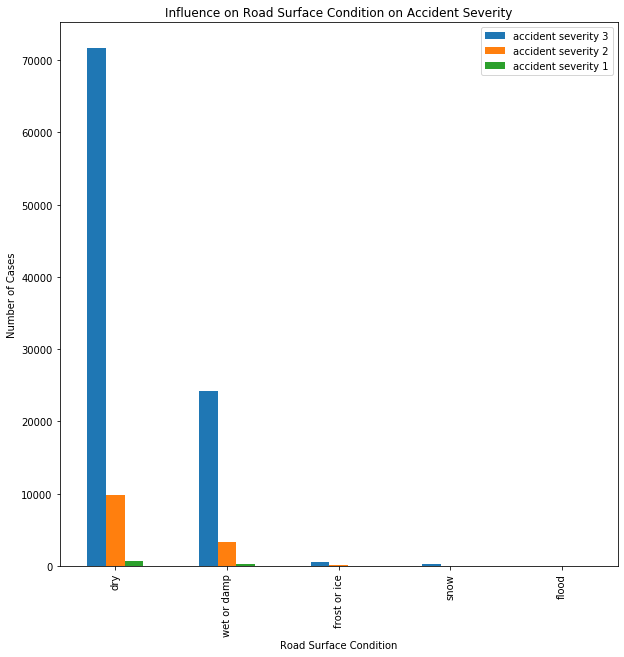

In [17]:
df_rsactot.plot(kind='bar', figsize=(10,10))
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Cases')
plt.title('Influence on Road Surface Condition on Accident Severity')

In [19]:
df_rsactot_mod = df_rsactot
df_rsactot_mod['accident severity 3'].replace(71658, 0, inplace=True)
df_rsactot_mod['accident severity 3'].replace(24156	, 0, inplace=True)
df_rsactot_mod

,accident severity 3,accident severity 2,accident severity 1
dry,0,9875,669
wet or damp,0,3303,203
frost or ice,581,80,4
snow,248,13,2
flood,43,7,0


Text(0.5, 1.0, 'Influence on Road Surface Condition on Accident Severity')

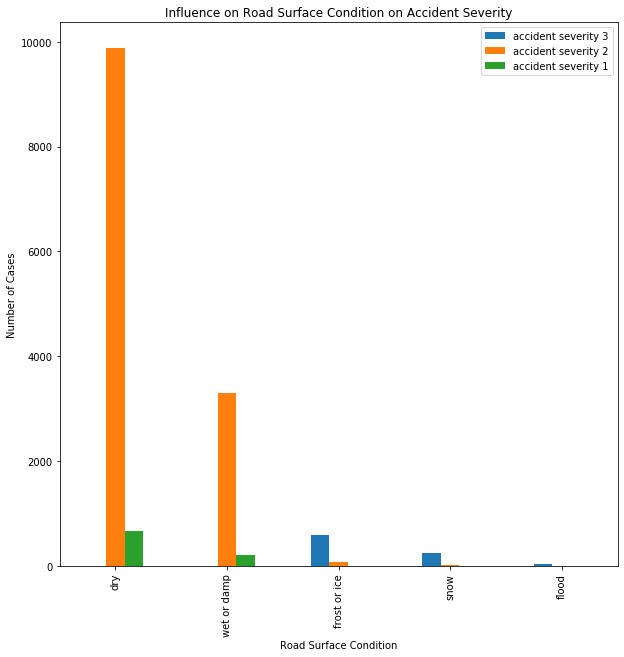

In [20]:
df_rsactot_mod.plot(kind='bar', figsize=(10,10))
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Cases')
plt.title('Influence on Road Surface Condition on Accident Severity')